# Spam Message Classification

### 1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data\spam.tsv", sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# Checking the null values inside the data
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


#### Statistical Analysis:-
1. Here total record is 5572 Examples and average words in each senetence is around 80.
2. Maximum length of sentence is 910. and Minimum length is 2.
3. The average punctuation in each sentence is roughly around 4

In [5]:
# Distribution of ham and span in percentages
chart = df['label'].value_counts()/len(df['label']) * 100
chart

ham     86.593683
spam    13.406317
Name: label, dtype: float64

### Notes:-
1) Here data is imbalaned as ham is around 86 percentage and spam is around 13 percentage.

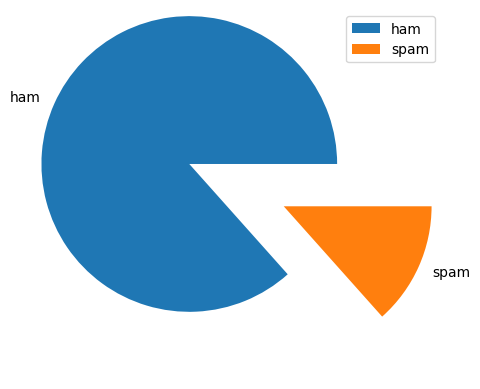

In [6]:
mylables = chart.index
values = np.array(chart)
plt.pie(values, labels=mylables, explode = [0.5, 0.2])
plt.legend()
plt.show()

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
spam = df[df['label'] == 'spam']
ham = df[df['label'] == 'ham']

In [9]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [10]:
# Due to imbalance dataset, for this example we are taking randomly ham example.
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [12]:
data = ham.append(spam, ignore_index=True)
data

C:\Users\shubhamumakantk\AppData\Local\Temp\ipykernel_2272\3552038384.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


,label,message,length,punct
0,ham,My computer just fried the only essential part...,162,7
1,ham,"Sure, whenever you show the fuck up &gt;:(",42,5
2,ham,Ok thanx...,11,3
3,ham,You best watch what you say cause I get drunk ...,63,0
4,ham,No message..no responce..what happend?,38,5
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [13]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

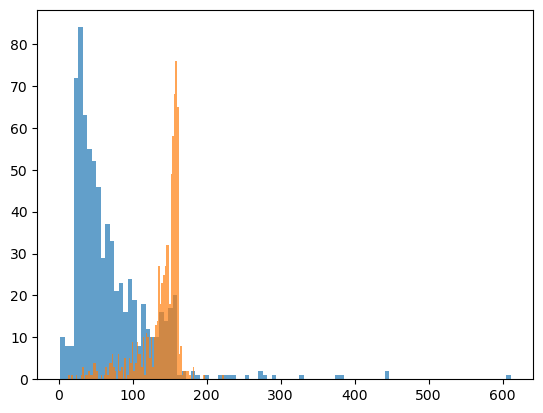

In [14]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()

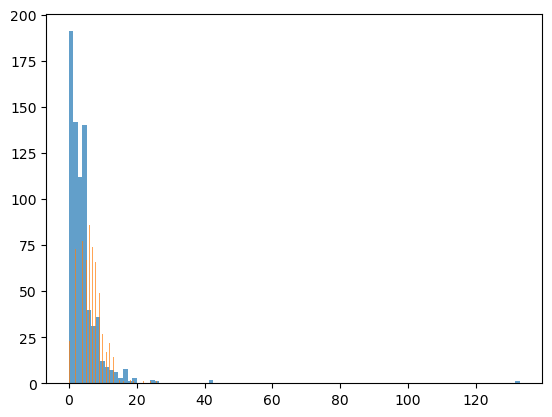

In [15]:
plt.hist(data[data['label'] == 'ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [16]:
data

,label,message,length,punct
0,ham,My computer just fried the only essential part...,162,7
1,ham,"Sure, whenever you show the fuck up &gt;:(",42,5
2,ham,Ok thanx...,11,3
3,ham,You best watch what you say cause I get drunk ...,63,0
4,ham,No message..no responce..what happend?,38,5
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1045,), (449,), (1045,), (449,))

### Building the model (Random Forest)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [21]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=10))])

In [22]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

### Predicting the result (Random Forest)

In [23]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [26]:
accuracy_score(y_test, y_pred)

0.9131403118040089

In [28]:
# Calculating the total number of right Message in test dataset
len(y_test), 0.9131403118040089 * len(y_test)  # Out of 449 only 410 values are correct

(449, 410.0)

In [29]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 35, 187]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.86      0.98      0.92       227
        spam       0.98      0.84      0.91       222

    accuracy                           0.91       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.91      0.91       449



### Building the model (SVM)

In [32]:
from sklearn.svm import SVC

In [34]:
svm = Pipeline([('tfidf', TfidfVectorizer()), ('svm', SVC(C=100, gamma='auto'))])

In [35]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=100, gamma='auto'))])

### Predicting the results (SVM)

In [37]:
y_pred_svm = svm.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred_svm)

0.9443207126948775

In [39]:
confusion_matrix(y_test, y_pred_svm)

array([[225,   2],
       [ 23, 199]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



#### Applying real examples on models

In [42]:
test1 = ["Hello, you are learning Natural Language Processing"]
test2 = ["Hope your are doing good and learning new things !"]
test3 = ["Congratulation, you won a lottery ticket worth $ 1 Million! To claim call on 446677"]

In [43]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [44]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
